## Imports

In [56]:
# this is a hack to have pylance working with tensorflow and keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
keras = tf.keras

## Load MNIST dataset

In [57]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Get some information

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


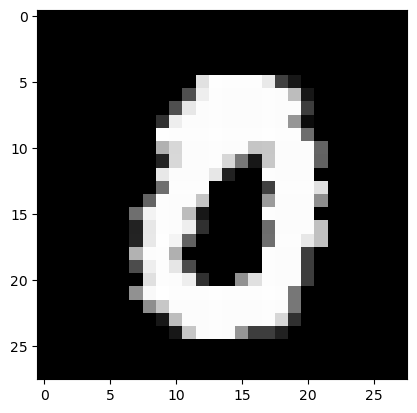

In [59]:
plt.imshow(x_train[69], cmap='Greys_r')

## Turn number labels into categories (one-hot-encoding)
We need to one hot encode the data

In [60]:
y_train_encoded = keras.utils.to_categorical(y=y_train)
y_test_encoded = keras.utils.to_categorical(y=y_test)

## Scale x data

In [61]:
x_train_scaled = x_train/np.max(x_train)
x_test_scaled = x_test/np.max(x_train)

## Built the model

In [62]:
model = keras.models.Sequential()
model.add(
    keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        input_shape=(28, 28, 1),
    ),
)
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(rate=0.2))
model.add(
    keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
    ),
)
model.add(keras.layers.Flatten())
# cannot be 1 since we now have 10 categories
model.add(keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

history = model.fit(x_train_scaled, y_train_encoded, epochs=3)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                92170     
                                                      

## Evaluate the model

In [63]:
# Get trainings data accuracy
model.evaluate(x_train_scaled, y_train_encoded)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0260 - accuracy: 0.9916


[0.02602243237197399, 0.9915666580200195]

In [64]:
# Get testing data accuracy
model.evaluate(x_test_scaled, y_test_encoded)

313/313 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9891


[0.03526722267270088, 0.9890999794006348]

## Check some random predicted samples

Real class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Input feature:


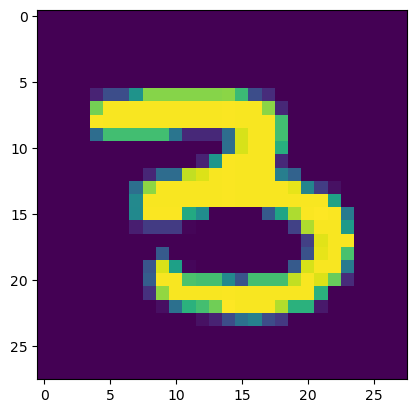

In [65]:
feature = 51
print(f'Real class: {y_test_encoded[feature]}')
print('Input feature:')
plt.imshow(x_test_scaled[feature, :, :])

In [66]:
test_val = model.predict(x_test_scaled[feature, :, :].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 61ms/step


In [67]:
np.sum(test_val[0])

0.99999994

## Turn prediction probabilities into a label

In [86]:
x_test_scaled_reshaped = x_test_scaled.reshape(10000, 28, 28, 1)
x_test_scaled_reshaped
y_pred = model.predict(x_test_scaled_reshaped)

313/313 [==============================] - 1s 2ms/step


## Plot confusion matrix

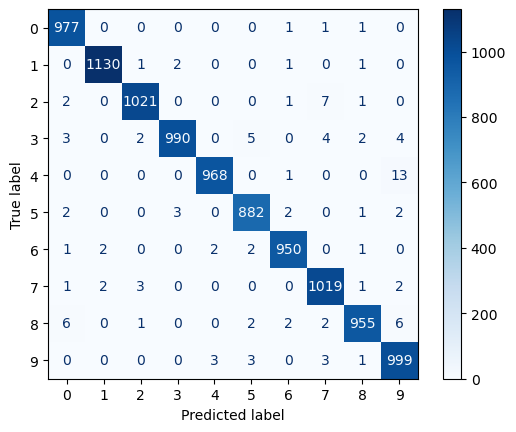

In [88]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_test_argmax, y_pred_argmax)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

## The problem with Sigmoid in multiclass models
...